### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib notebook

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Read Data

In [4]:
data = pd.read_csv('train.csv')

In [59]:
data_2 = pd.read_csv('train.csv')

In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### High level analysis

In [6]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
data.describe(include = ['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
data.shape

(550068, 12)

### Cleaning

In [10]:
data.isnull().sum() # number of null values, only in category_2 and 3

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
null_percent = (data.isnull().sum()/data.shape[0] * 100)
null_percent

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [12]:
data['Product_Category_3'].head()

0     NaN
1    14.0
2     NaN
3     NaN
4     NaN
Name: Product_Category_3, dtype: float64

In [13]:
data['Product_Category_3'].fillna(0, inplace = True)
data['Product_Category_2'].fillna(0, inplace = True)

In [14]:
data['Product_Category_3'].head(10)

0     0.0
1    14.0
2     0.0
3     0.0
4     0.0
5     0.0
6    17.0
7     0.0
8     0.0
9     0.0
Name: Product_Category_3, dtype: float64

In [15]:
data['Product_Category_2'].head(10)

0     0.0
1     6.0
2     0.0
3    14.0
4     0.0
5     2.0
6     8.0
7    15.0
8    16.0
9     0.0
Name: Product_Category_2, dtype: float64

In [16]:
data['Gender'] = data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes

In [17]:
data['Product_ID'] = data['Product_ID'].astype('category')
data['Product_ID'] = data['Product_ID'].cat.codes

In [18]:
data['Gender'].unique()

array([0, 1], dtype=int64)

In [19]:
data['Gender'].head() # female = 0, male = 1

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int8

In [20]:
data = pd.get_dummies(data, columns = ['Age', 'Stay_In_Current_City_Years', 'City_Category'])

In [21]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Occupation', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'City_Category_A', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [22]:
data.head(10)

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,...,Age_51-55,Age_55+,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_A,City_Category_B,City_Category_C
0,1000001,672,0,10,0,3,0.0,0.0,8370,1,...,0,0,0,0,1,0,0,1,0,0
1,1000001,2376,0,10,0,1,6.0,14.0,15200,1,...,0,0,0,0,1,0,0,1,0,0
2,1000001,852,0,10,0,12,0.0,0.0,1422,1,...,0,0,0,0,1,0,0,1,0,0
3,1000001,828,0,10,0,12,14.0,0.0,1057,1,...,0,0,0,0,1,0,0,1,0,0
4,1000002,2734,1,16,0,8,0.0,0.0,7969,0,...,0,1,0,0,0,0,1,0,0,1
5,1000003,1831,1,15,0,1,2.0,0.0,15227,0,...,0,0,0,0,0,1,0,1,0,0
6,1000004,1745,1,7,1,1,8.0,17.0,19215,0,...,0,0,0,0,1,0,0,0,1,0
7,1000004,3320,1,7,1,1,15.0,0.0,15854,0,...,0,0,0,0,1,0,0,0,1,0
8,1000004,3604,1,7,1,1,16.0,0.0,15686,0,...,0,0,0,0,1,0,0,0,1,0
9,1000005,2631,1,20,1,8,0.0,0.0,7871,0,...,0,0,0,1,0,0,0,1,0,0


### Feature Engineering

<IPython.core.display.Javascript object>


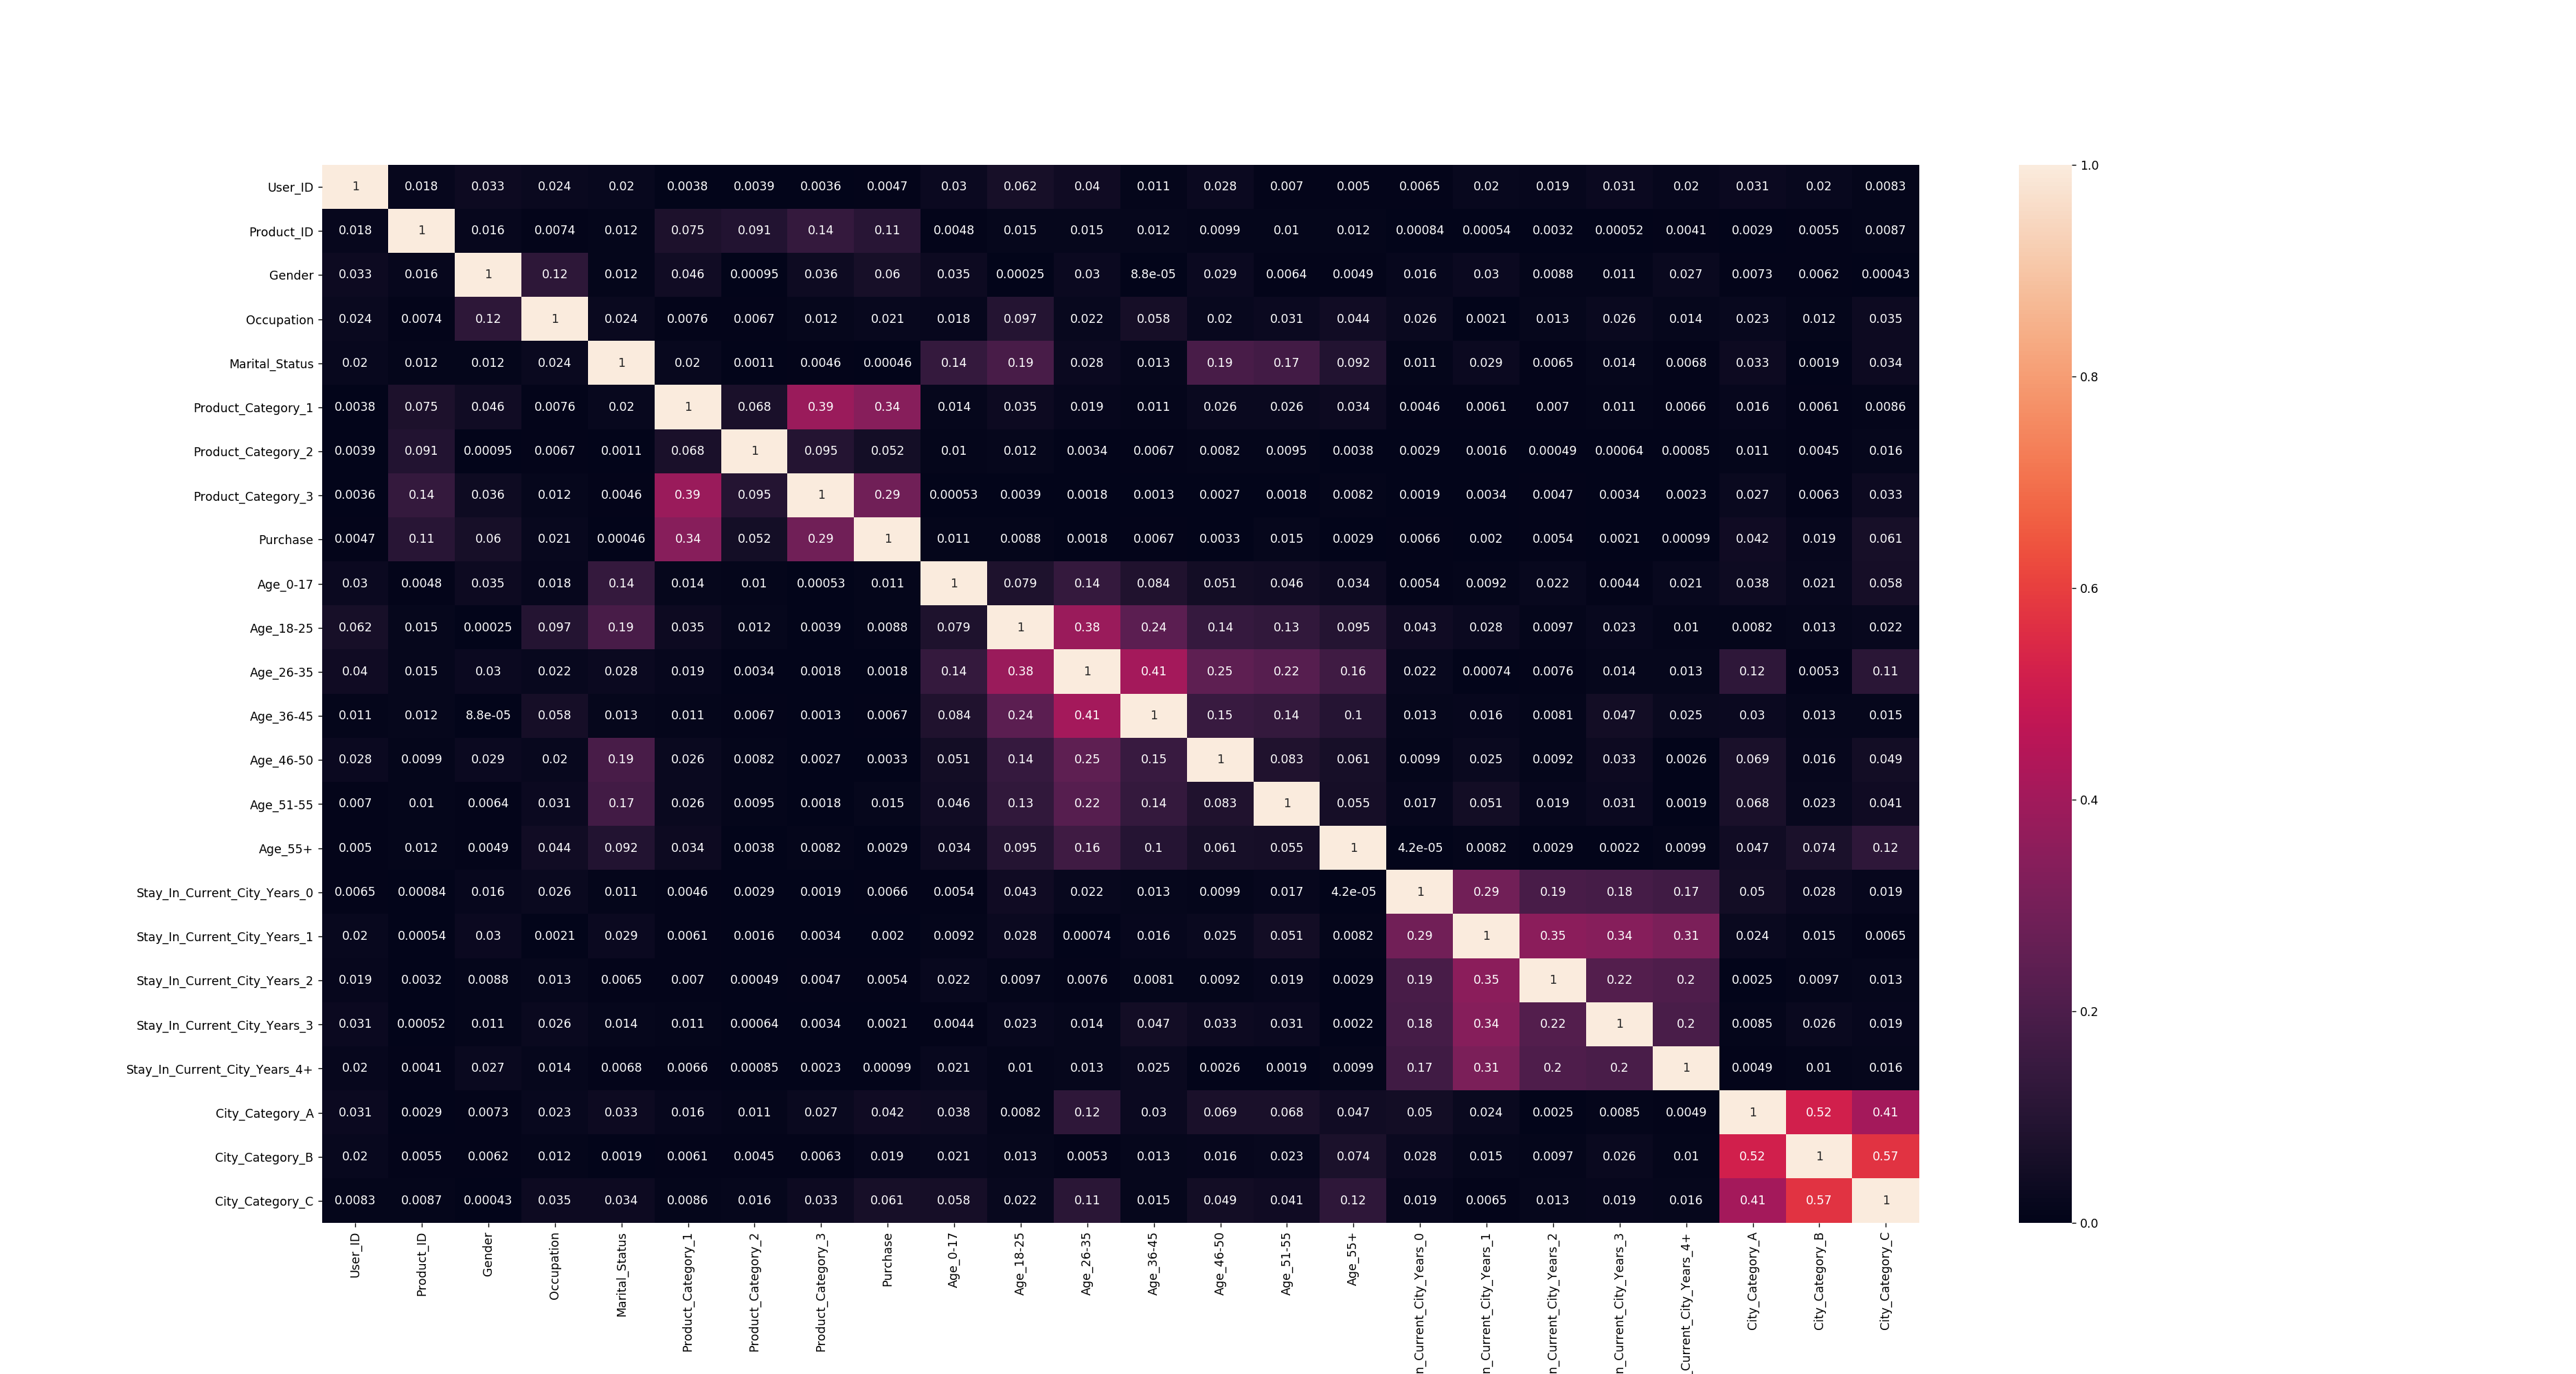

In [24]:
corr = data.corr()
corr = np.abs(corr)
figure = plt.figure(figsize= (30, 16))
sns.heatmap(corr, annot= True)
plt.show()

In [25]:
plt.close()

### Splitting and Scaling

In [26]:
X = data.drop(['Purchase'], axis = 1)
y = data['Purchase']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
mod = RandomForestRegressor()
mod.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
mod.score(X_test, y_test)

0.6803143828899846

### Tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV
n_est = [int(x) for x in np.linspace(start = 1, stop = 200, num = 4)]
max_feat = ['auto', 'sqrt']
max_dep = [int(x) for x in np.linspace(1, 50, num = 11)]
max_dep.append(None)
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrp = [True, False]
rand_grid = {'n_estimators': n_est,
            'max_features': max_feat,
            'max_depth': max_dep,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrp}
rf_rand = RandomizedSearchCV(estimator = mod, param_distributions = rand_grid,
                             cv = 3)
rf_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [1, 67, 133, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

### Testing

In [47]:
mod = rf_rand.best_estimator_
mod.fit(X_train, y_train)
mod.score(X_test, y_test)

0.7146038612447144

In [48]:
print(rf_rand.best_params_)

{'n_estimators': 67, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 35, 'bootstrap': True}


In [49]:
y_pred = mod.predict(X_test)

In [51]:
y_pred

array([ 9754.38884978, 11357.97525658,  7217.52206115, ...,
       12660.81234628, 15159.93560838, 10065.07662151])

### Visualizations

<IPython.core.display.Javascript object>


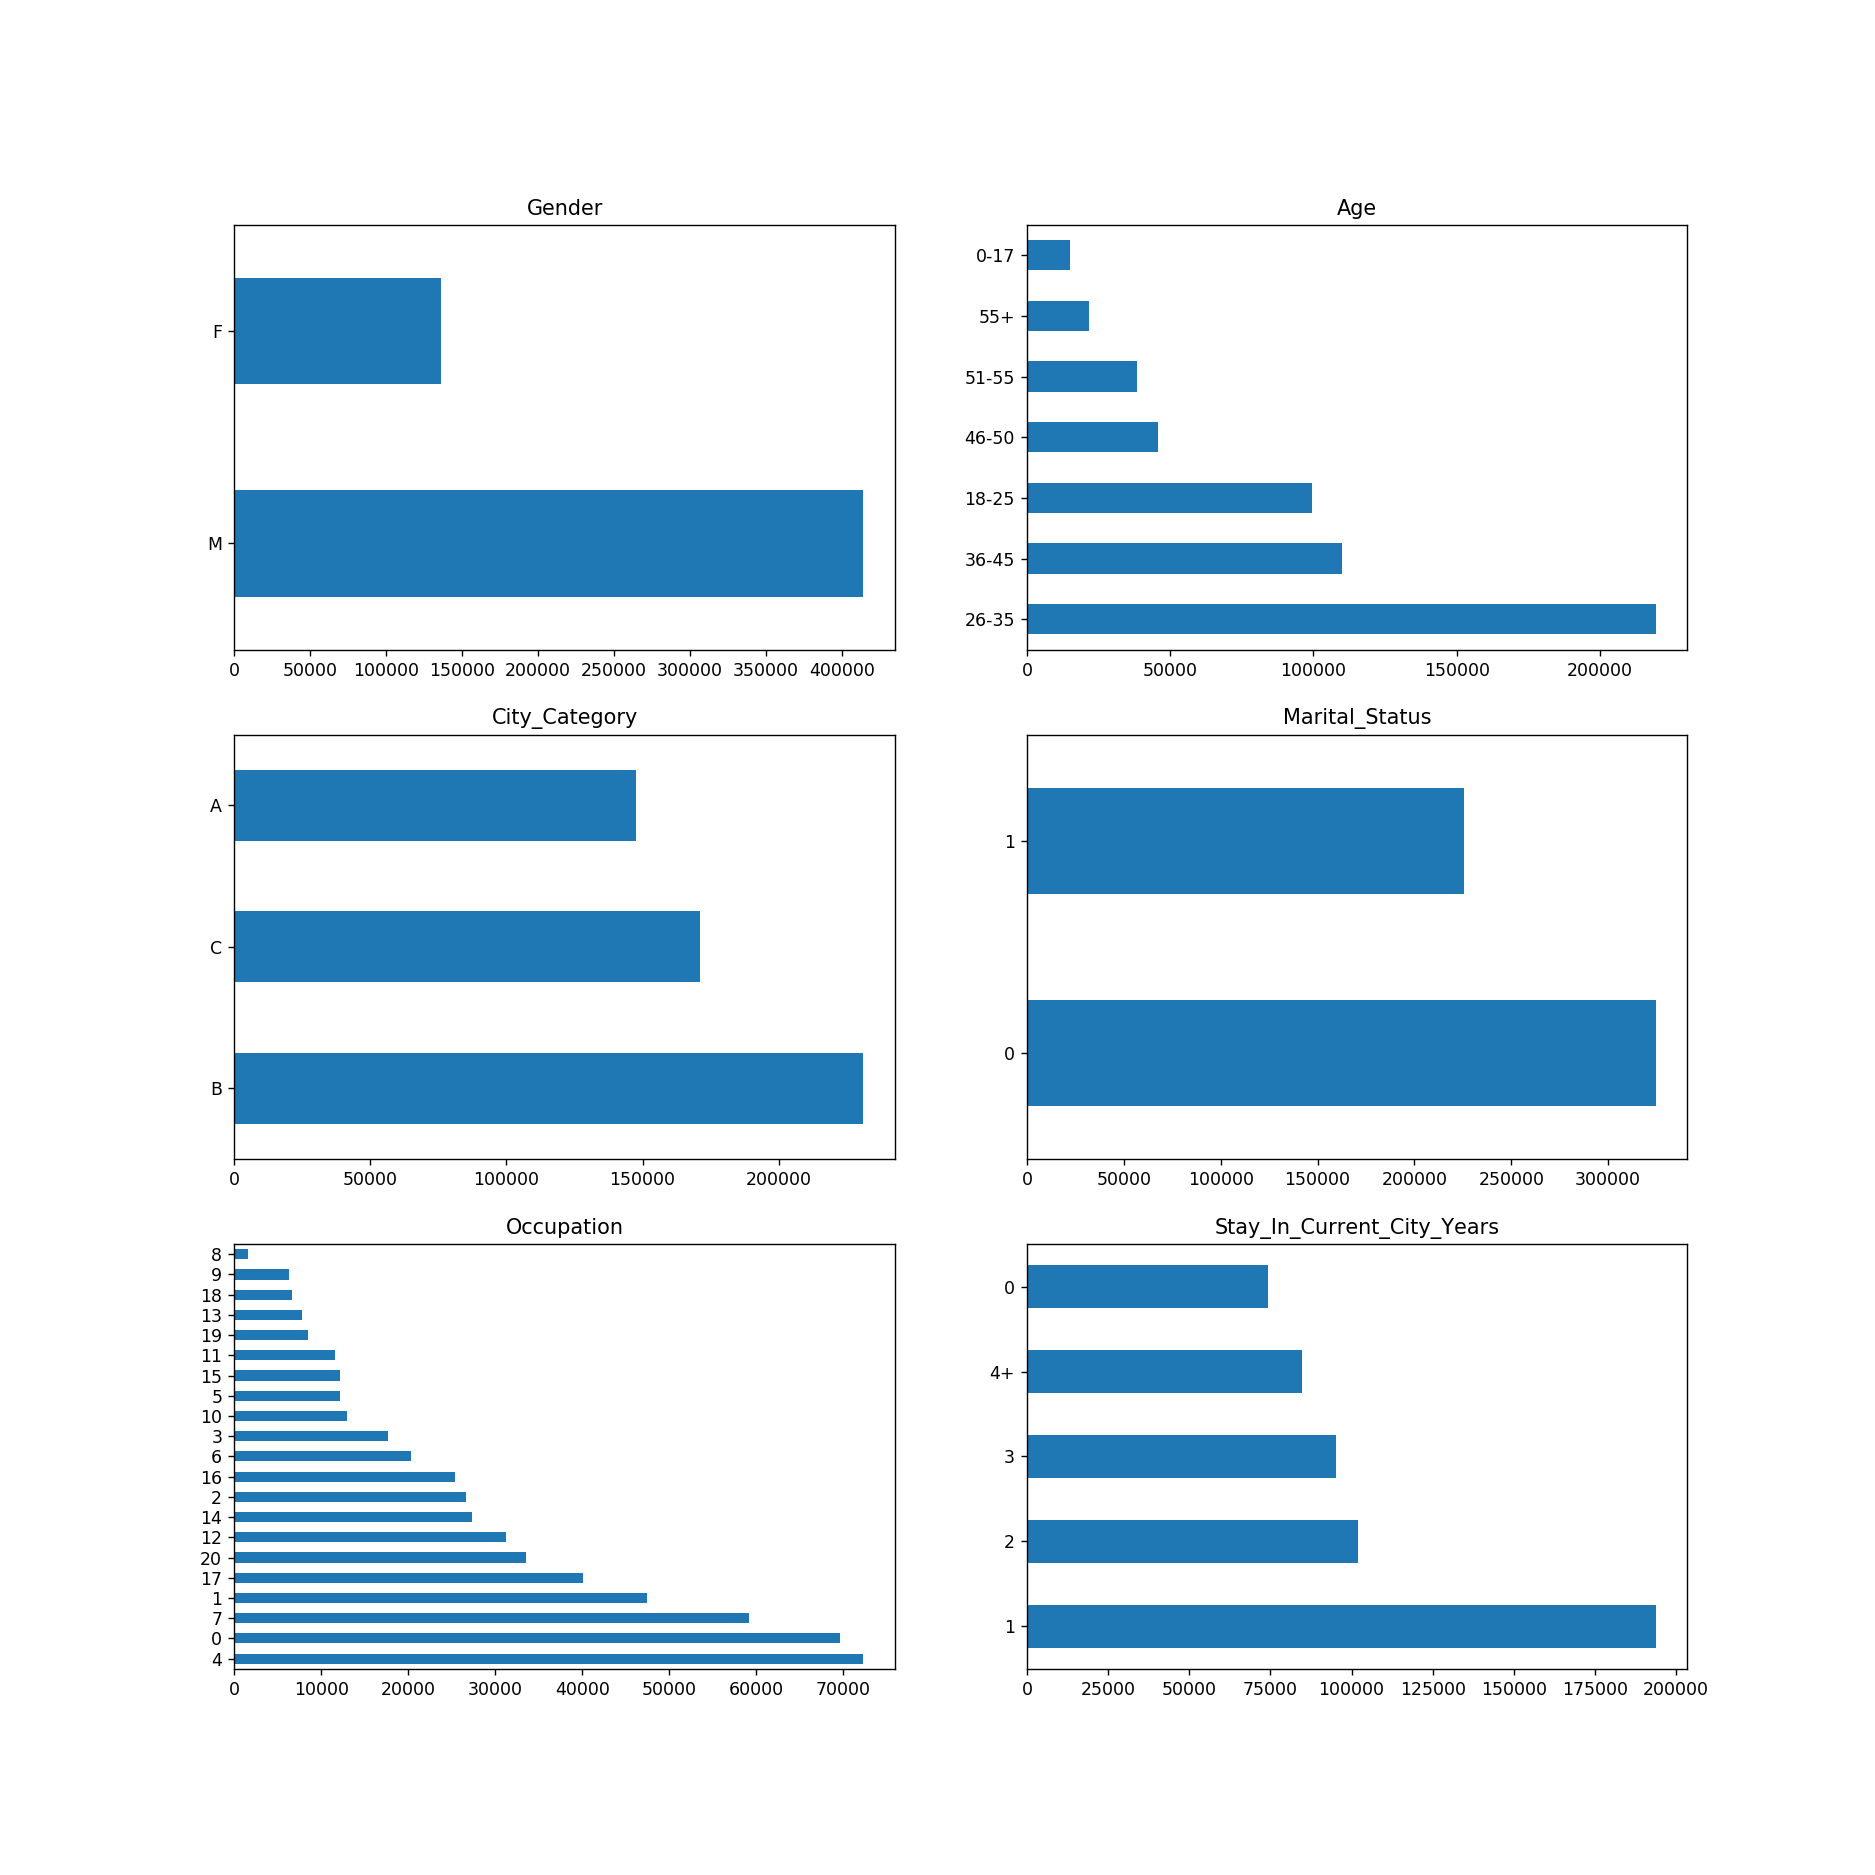

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])

data_2['Gender'].value_counts().plot(kind='barh', ax=axes[0,0], title='Gender')
data_2['Age'].value_counts().plot(kind='barh', ax=axes[0,1], title='Age')
data_2['City_Category'].value_counts().plot(kind='barh', ax=axes[1,0], title='City_Category')
data_2['Marital_Status'].value_counts().plot(kind='barh', ax=axes[1,1], title='Marital_Status')
data_2['Occupation'].value_counts().plot(kind='barh', ax=axes[2,0], title='Occupation')
data_2['Stay_In_Current_City_Years'].value_counts().plot(kind='barh', ax=axes[2,1], title='Stay_In_Current_City_Years')

plt.show()

In [64]:
plt.close()